# **PYTHON PROJECT**
## ***Netflix Movies and TV Shows***

**Introduction**

- This Python project focuses on analyzing a comprehensive dataset containing information about movies and TV shows available on the popular streaming platform, Netflix. The dataset encompasses various features such as titles, directors, cast members, countries of origin, release years, content ratings, durations, and descriptive synopses. By leveraging Python's powerful data manipulation and visualization libraries, the project aims to explore and gain valuable insights from this rich dataset.
- The project begins by importing essential libraries like NumPy, Pandas, Seaborn, and Matplotlib, which are widely used for data processing, analysis, and visualization tasks. It then reads the dataset and provides an overview of its structure, data types, and initial observations. Exploratory data analysis techniques are employed to understand the distribution of different features, identify missing values, and uncover potential relationships between variables.



First, let's import some basic required libraries used for processing data and visualisation.

In [ ]:
## Required Libraries
import numpy as np                              # linear algebra
import pandas as pd                             # data processing
import seaborn as sns                           # visualisation
import matplotlib.pyplot as plt                 # visualisation
import re
from wordcloud import WordCloud
from sklearn.cluster import KMeans              # import the KMeans class

## **I. Data Observations & Exploration**

Read the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset for Project/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Let's see the data infor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


> We can also see director, cast, country, rating and duration are missing
values.

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Summary Statistics for Movies
df_movie = df[df["type"] == "Movie"]
df_movie.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,6131,6131,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,6131,1,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,6131,6131,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5943,4354,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,6131,5446,No Cast Information,475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,5691,651,United States,2058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,6131,1533,"January 1, 2020",97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,6131.0,NaN,NaN,NaN,2013.121514,9.678169,1942.0,2012.0,2016.0,2018.0,2021.0
rating,6129,17,TV-MA,2062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,6128.0,NaN,NaN,NaN,99.577187,28.290593,3.0,87.0,98.0,114.0,312.0


In [ ]:
# Summary Statistics for TV Shows
df_tv = df[df["type"] == "TV Show"]
df_tv.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,2676,2676,s2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,2676,1,TV Show,2676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,2676,2676,Blood & Water,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,230,222,Alastair Fothergill,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,2676,2284,No Cast Information,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,2285,196,United States,760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,2666,1051,"July 6, 2021",31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,2676.0,NaN,NaN,NaN,2016.605755,5.740138,1925.0,2016.0,2018.0,2020.0,2021.0
rating,2674,9,TV-MA,1145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,2676.0,NaN,NaN,NaN,1.764948,1.582752,1.0,1.0,1.0,2.0,17.0


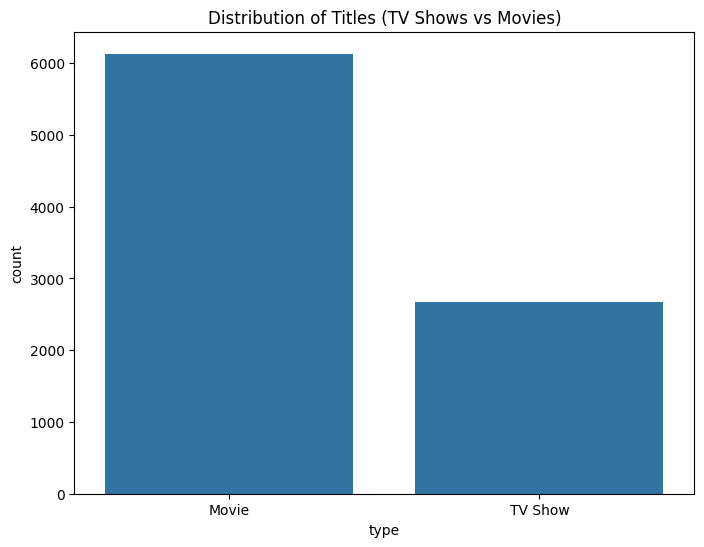

In [ ]:
# Countplot of TV shows and movies
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Titles (TV Shows vs Movies)')
plt.show()

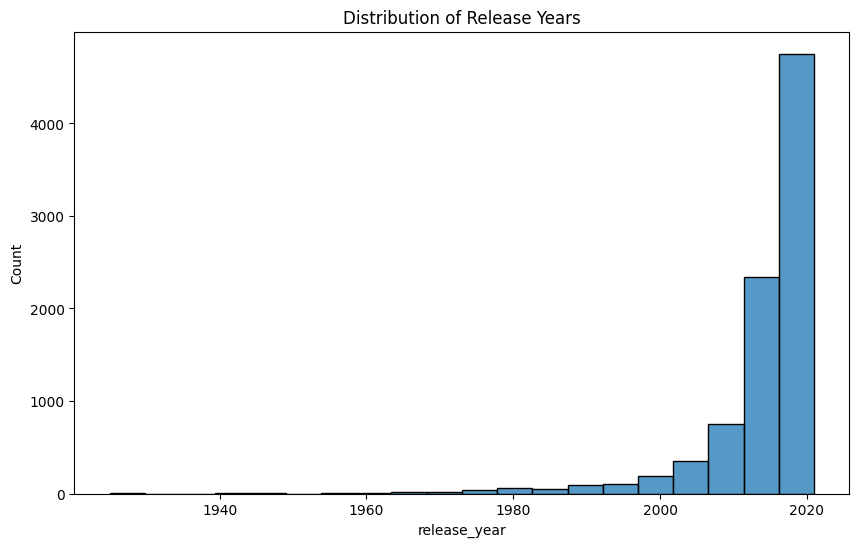

In [ ]:
# Distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=20)
plt.title('Distribution of Release Years')
plt.show()

> This bar chart displays the distribution of release years for the movies and shows. This lists all the years from the late 1800s up to the present. We can see that the bars get taller and taller towards the right side, indicating more and more content being produced in more recent decades. The very tallest bars are for the last 10-15 years, suggesting a significant increase in production volume in modern times.

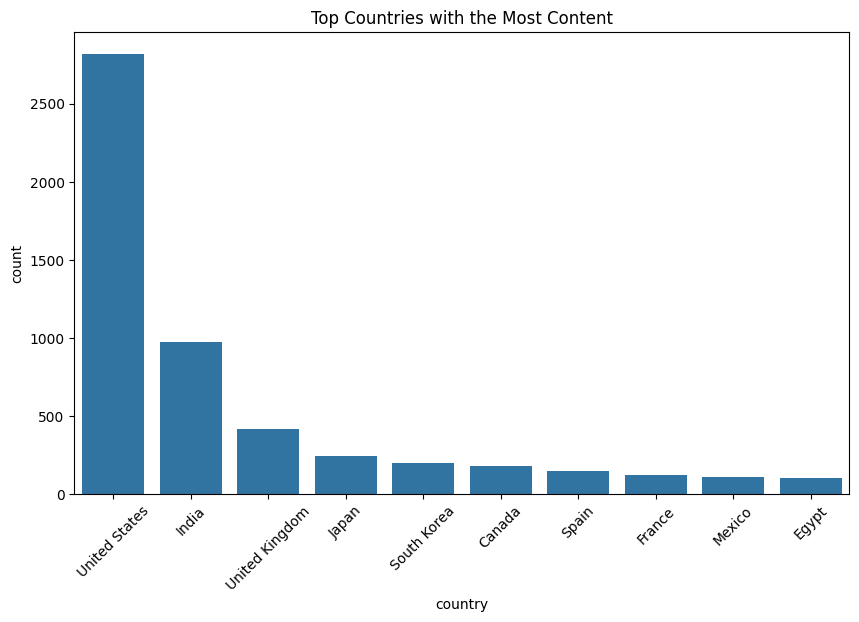

In [ ]:
# Top countries with the most content
top_countries = df['country'].value_counts().reset_index()
top_countries.columns = ['country', 'count']
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', data=top_countries.head(10))
plt.xticks(rotation=45)
plt.title('Top Countries with the Most Content')
plt.show()

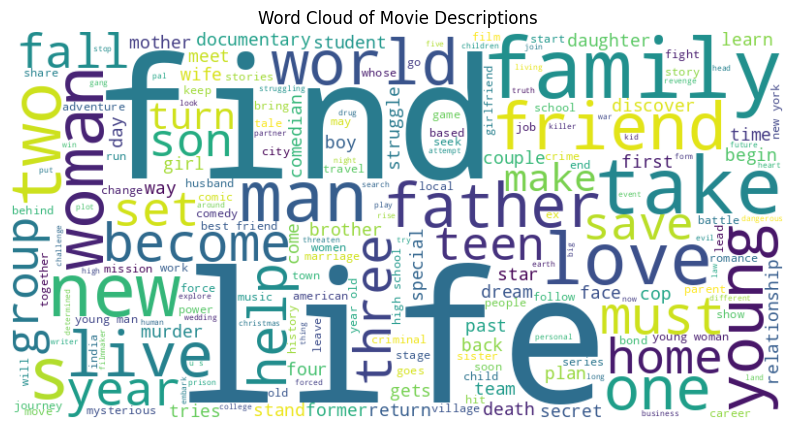

In [ ]:
# Word cloud of movie descriptions
movie_desc = ' '.join(df[df['type'] == 'Movie']['description'].dropna().str.lower())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_desc)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

> This a word cloud visualization from the movies description. It combines all movie descriptions into a single text, converts them to lowercase, and creates a word cloud where the size of each word corresponds to its frequency in the descriptions. This visualization offers a concise and visual summary of the main themes or topics present in the movie descriptions, providing insights into the overall content of the dataset.

<ipython-input-53-e7a76ebad900>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


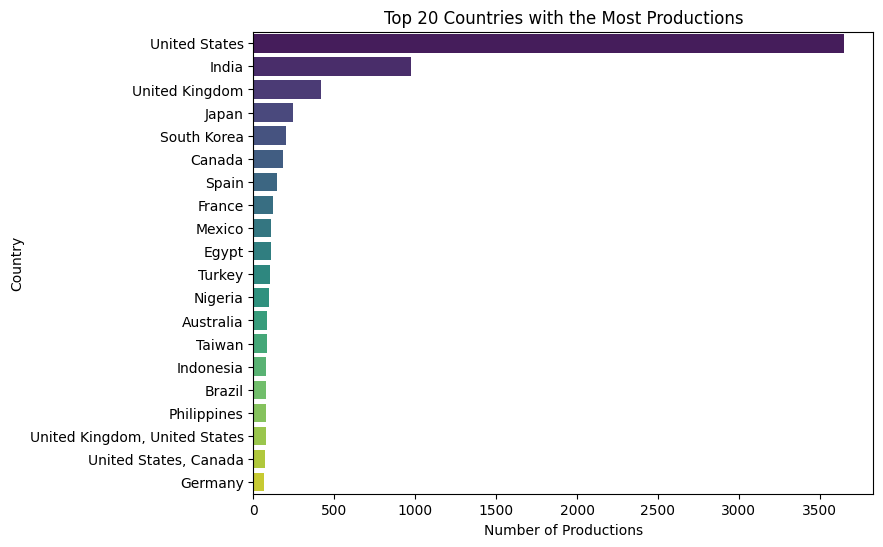

In [ ]:
plt.figure(figsize=(8, 6))
country_counts = df['country'].value_counts().head(20)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 20 Countries with the Most Productions')
plt.xlabel('Number of Productions')
plt.ylabel('Country')
plt.show()

> This horizontal bar chart ranks the top 20 countries by the number of productions. The United States stands out with the longest purple bar, representing the highest production output. India and the United Kingdom follow as the next most prolific production countries. We also see several European nations, Asian countries like Japan and South Korea, as well as some contributions from places like Mexico, Egypt, and Nigeria among the top 20.

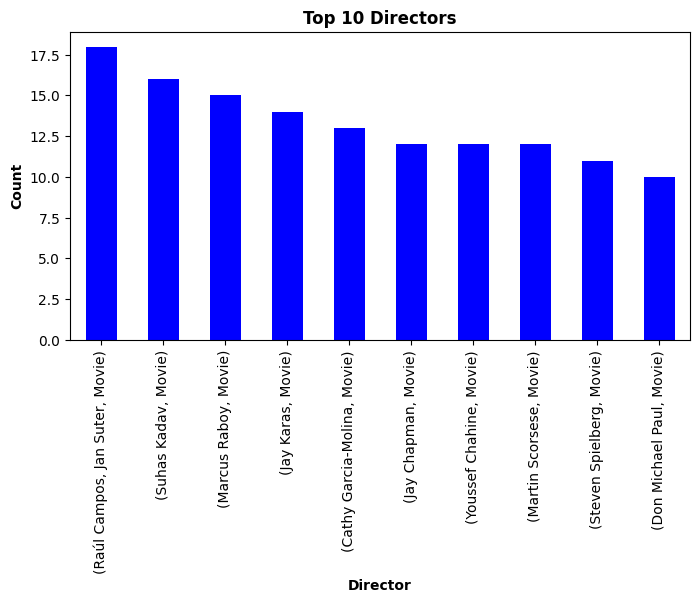

In [ ]:
plt.figure(figsize=(8, 4))
top_10_directors.plot(x='director', y='count', kind='bar',color='blue')
plt.title('Top 10 Directors',fontweight='bold')
plt.xlabel('Director',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

> This bar graph highlights the top 10 directors in the dataset based on the number of productions they have directed. The x-axis lists the director names, while the y-axis shows the count of their productions. The tallest bar represents the most prolific director, followed by the next few tallest bars for the other top directors in descending order of production count.

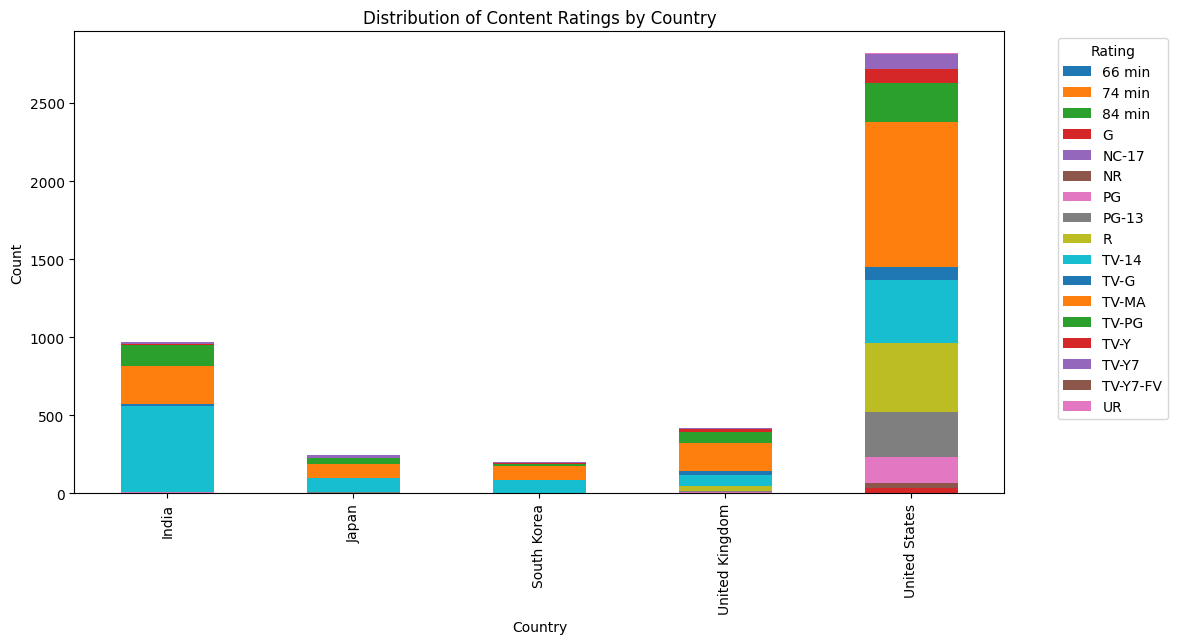

In [ ]:
# Distribution of Content Ratings by Country
countries = ['United States', 'United Kingdom', 'India', 'South Korea', 'Japan']
filtered_df = df[df['country'].isin(countries)]  # Use 'df' instead of 'df_final'
rating_counts = filtered_df.groupby(['country', 'rating']).size().unstack()
rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings by Country')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

> This including only entries from specific countries like the United States, United Kingdom, India, South Korea, and Japan. It then groups the data by country and content rating, counting the occurrences of each rating within each country. The resulting stacked bar plot visually compares the distribution of content ratings across these countries, providing a quick overview of how ratings vary by country. The legend positioned outside the plot helps in understanding which ratings correspond to each color in the stacked bars. Ultimately, the aims to analyze and visualize the distribution of content ratings by country in a concise manner.

## **III. Feature Engineering**

In [ ]:
# Create a new column for content age
df['content_age'] = 2024 - df['release_year']

In [ ]:
# Check the new column by displaying its first few entries
print(df[['release_year', 'content_age']].head())

   release_year  content_age
0          2020            4
1          2021            3
2          2021            3
3          2021            3
4          2021            3


In [ ]:
# Alternatively, you can use describe to get summary statistics
print(df['content_age'].describe())

count    8807.000000
mean        9.819802
std         8.819312
min         3.000000
25%         5.000000
50%         7.000000
75%        11.000000
max        99.000000
Name: content_age, dtype: float64


> - The head method is used to display the first few rows of the DataFrame, which helps you quickly inspect the new column.
- The describe method provides summary statistics for the content_age column, giving you insights into its distribution (e.g., count, mean, min, max, standard deviation).

In [ ]:
# Convert duration to numeric (minutes)
df['duration'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if not pd.isna(x) else np.nan)

> This converts the 'duration' column in a DataFrame (e.g., "120 min") to numeric values in minutes. It uses the apply method with a lambda function to extract the numeric part of each duration string and convert it to an integer, while ensuring that missing values (NaN) remain unchanged. This conversion facilitates further data analysis requiring numeric duration values.

In [ ]:
# Create a new column for the number of cast members
df['cast_count'] = df['cast'].apply(lambda x: len(x.split(', ')) if x != 'No Cast Information' else 0)

In [ ]:
# Check the new column by displaying its first few entries
print(df[['cast', 'cast_count']].head())

                                                cast  cast_count
0                                No Cast Information           0
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...          19
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           9
3                                No Cast Information           0
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...           8


## **IIII. Analyze Genres**

In [ ]:
# Extract genres from the 'description' column
df['genres'] = df['description'].apply(lambda x: ', '.join(re.findall(r'\b(\w+)\s+TV', str(x))) if pd.notnull(x) else '')

In [ ]:
# Check the new 'genres' column by displaying its first few entries
print(df[['description', 'genres']].head())

                                         description genres
0  As her father nears the end of his life, filmm...       
1  After crossing paths at a party, a Cape Town t...       
2  To protect his family from a powerful drug lor...       
3  Feuds, flirtations and toilet talk go down amo...       
4  In a city of coaching centers known to train I...       


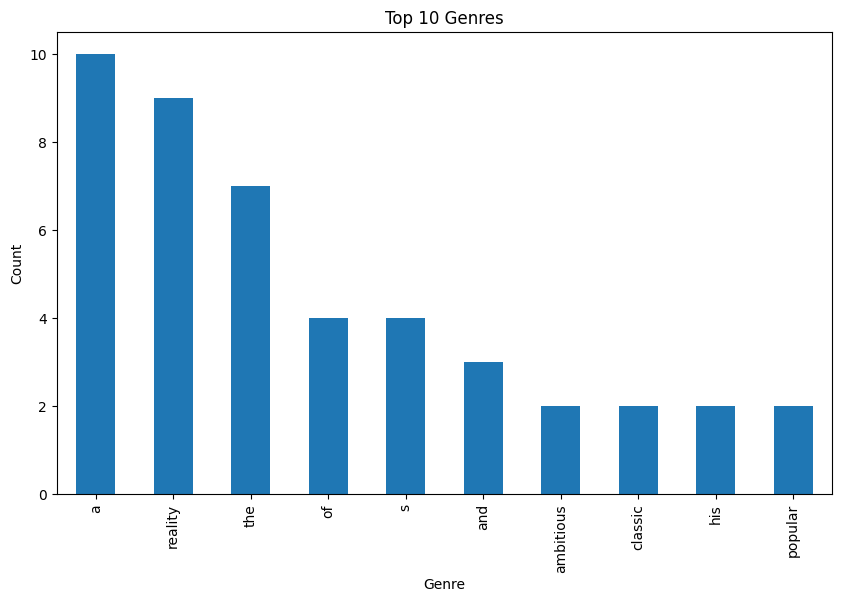

In [ ]:
# Count the frequency of genres
genre_counts = df['genres'].str.get_dummies(', ').sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

> This explain snippet extracts genres from a 'genres' column, converts them into dummy variables using `str.get_dummies(', ')`, then sums up their occurrences and sorts them to find the top 10 most common genres. It visualizes these top genres as a bar chart to provide a clear understanding of their frequency distribution. The purpose is to analyze and present the prevalence of different genres within the dataset, aiding in genre-based insights and decision-making.

## **IIIII. Data Modeling and Analysis**

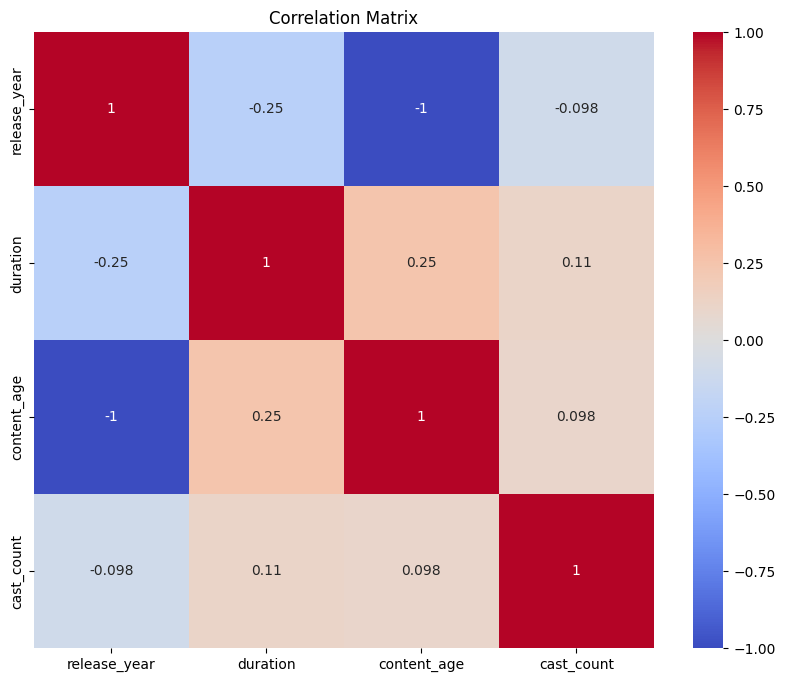

In [ ]:
# Correlation analysis
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

> This explains the correlation analysis on the numeric columns. Selecting only the numerical data creates a heatmap visualization using Seaborn to display the correlation matrix. This heatmap illustrates the strength and direction of relationships between different numeric features. High positive correlations are represented by warmer colours (closer to red), while high negative correlations are depicted by cooler colours (closer to blue). This analysis aids in identifying patterns and dependencies among numerical variables, providing insights into their interrelationships within the dataset.

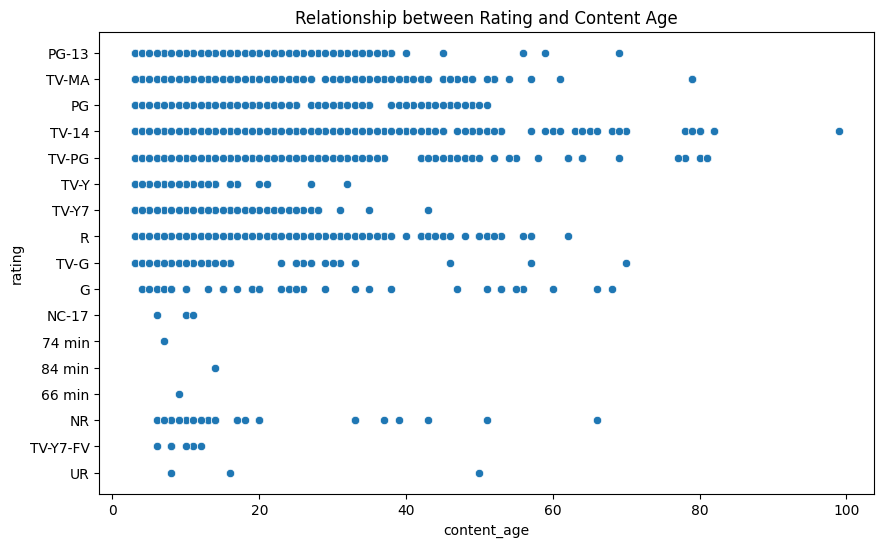

In [ ]:
# Relationship between rating and content age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='content_age', y='rating', data=df)
plt.title('Relationship between Rating and Content Age')
plt.show()

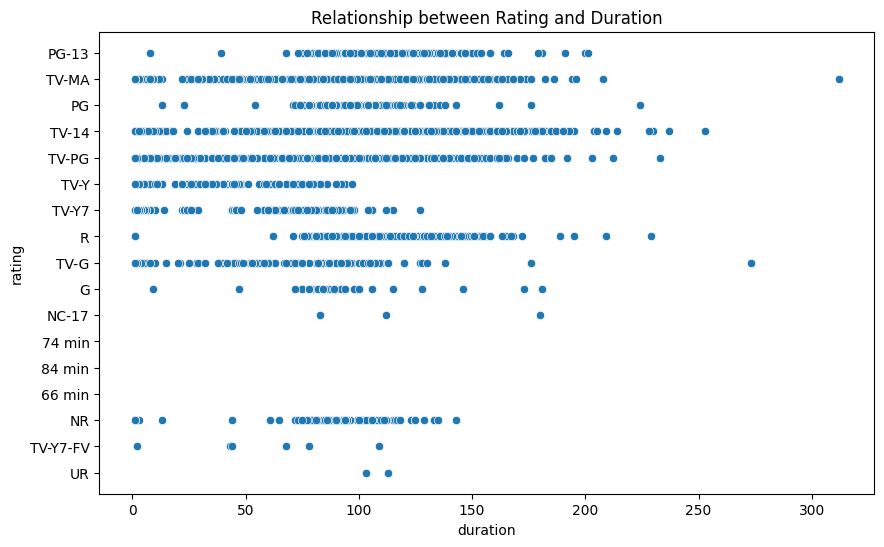

In [ ]:
# Relationship between rating and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='rating', data=df)
plt.title('Relationship between Rating and Duration')
plt.show()

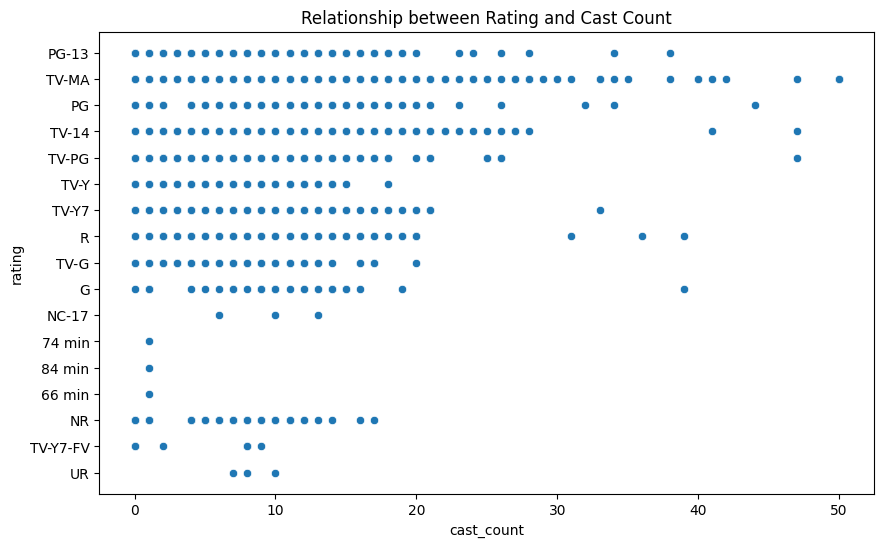

In [ ]:
# Relationship between rating and cast count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cast_count', y='rating', data=df)
plt.title('Relationship between Rating and Cast Count')
plt.show()

> These aim to analyze how different attributes of content relate to its rating. Each scatter plot visualizes the relationship between the 'rating' feature and another attribute: 'content_age', 'duration', and 'cast_count'.
- The first examines whether the age of content influences its rating, revealing insights into viewer preferences over time.
- The second explores the relationship between content duration and rating, uncovering preferences for longer or shorter content.
- Lastly, the third investigates how the number of cast members correlates with content rating, providing insights into the impact of ensemble casts on audience reception.
- These analyses offer valuable insights for content creators and distributors to understand viewer preferences and behaviours.

In [ ]:
# Content clustering based on descriptions
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['description'])

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

df['cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Analyze clusters
print("\nCluster Analysis:")
for cluster_id in df['cluster'].unique():
    print(f"Cluster {cluster_id}:")
    print(df[df['cluster'] == cluster_id]['description'].sample(2))
    print("-" * 50)


Cluster Analysis:
Cluster 0:
5301    Armed with a powerful amulet, a teenage guardi...
3164    As controversy surrounds the evangelical churc...
Name: description, dtype: object
--------------------------------------------------
Cluster 4:
743     Philandering his way across Europe to find the...
7149    After a whirlwind romance, a couple rushes to ...
Name: description, dtype: object
--------------------------------------------------
Cluster 1:
8345    New straight-arrow sheriff Wallace finds he mu...
8052    A young Han Solo tries to settle an old score ...
Name: description, dtype: object
--------------------------------------------------
Cluster 3:
8227    A Yoruba prince and a young lady from a promin...
1831    With her home devastated by war, a Lebanese po...
Name: description, dtype: object
--------------------------------------------------
Cluster 2:
8292    At the remote farmhouse where she once witness...
8494    Johnny Depp stars in this adaptation of Hunter...
Name: desc

> This performs content clustering. First, the `TfidfVectorizer` from scikit-learn is utilized to convert the textual descriptions into a TF-IDF (Term Frequency-Inverse Document Frequency) matrix, which represents the importance of each word in the descriptions relative to the entire corpus while removing common English stopwords. Then, the KMeans algorithm is applied to the TF-IDF matrix to group the content into clusters. The number of clusters is specified as 5, but this can be adjusted based on the desired level of granularity. Finally, the content is assigned to clusters, and a sample of descriptions from each cluster is printed for cluster analysis. The purpose of this is to automatically group similar content based on their descriptions, enabling efficient organization and analysis of large datasets, such as in content recommendation systems or content categorization tasks.

## **IIIIII. Conclusion**

This Python project successfully analyzed a large dataset of Netflix movies and TV shows. Key insights were derived through exploratory data analysis, identifying distributions, top countries, and popular genres. Comprehensive data cleaning handled missing values and inconsistencies, while feature engineering enriched the dataset with new attributes like content age and cast count. Analytical techniques such as correlation analysis, visualizations (scatter plots, bar charts), and content clustering using TF-IDF and K-means were applied. The findings offer valuable understanding of viewer preferences, rating patterns, and relationships between content attributes like duration and cast size. This project demonstrates Python's powerful data analysis capabilities, benefiting content creators, distributors, and recommendation systems in making informed decisions and delivering better viewer experiences.